# MOVIE ANALYSIS AND PREDICTIONS

In [36]:
#import necessary libraries for the whole project-Analysis and Modelling 
import pandas as pd
import zipfile #to extract files from zipfile
import matplotlib.pyplot as plt
%matplotlib inline


In [1]:
#View contents of directory
%ls

 Volume in drive C has no label.
 Volume Serial Number is E2A6-39CF

 Directory of C:\Users\hp\Desktop\Movie Analysis

05/27/2024  03:11 PM    <DIR>          .
05/27/2024  03:11 PM    <DIR>          ..
05/27/2024  01:07 PM    <DIR>          .ipynb_checkpoints
05/27/2024  01:40 PM    <DIR>          dsc-phase-1-project-master
05/27/2024  01:29 PM        48,188,554 dsc-phase-1-project-master.zip
05/27/2024  03:11 PM            14,825 Movie_Analysis_and_Predictions.ipynb
05/27/2024  01:31 PM    <DIR>          path
               2 File(s)     48,203,379 bytes
               5 Dir(s)   5,577,269,248 bytes free


In [2]:
#Extract the ZipFile


zipfile_path = "dsc-phase-1-project-master.zip"
directory = r"C:\Users\hp\Desktop\Movie Analysis"

with zipfile.ZipFile(zipfile_path,"r") as zip_ref:
    zip_ref.extractall(directory)

#list zipfile contents extracted
#import os
import os
files_extracted = os.listdir(directory)

#View extracted files
print("Files Extracted:", files_extracted)


Files Extracted: ['.git', '.ipynb_checkpoints', 'dsc-phase-1-project-master', 'dsc-phase-1-project-master.zip', 'Movie_Analysis_and_Predictions.ipynb', 'path']


In [3]:
#get all files in the zip folder name dsc-phase-1-project-master.zip
#zip-ref is defined above 
zip_contents = zip_ref.namelist()

# Display all files
print("Contents of dsc-phase-1-project-master.zip:")
for item in zip_contents:
    print(item)


Contents of dsc-phase-1-project-master.zip:
dsc-phase-1-project-master/
dsc-phase-1-project-master/.canvas
dsc-phase-1-project-master/.gitignore
dsc-phase-1-project-master/CONTRIBUTING.md
dsc-phase-1-project-master/LICENSE.md
dsc-phase-1-project-master/README.md
dsc-phase-1-project-master/awesome.gif
dsc-phase-1-project-master/student.ipynb
dsc-phase-1-project-master/zippedData/
dsc-phase-1-project-master/zippedData/bom.movie_gross.csv.gz
dsc-phase-1-project-master/zippedData/imdb.name.basics.csv.gz
dsc-phase-1-project-master/zippedData/imdb.title.akas.csv.gz
dsc-phase-1-project-master/zippedData/imdb.title.basics.csv.gz
dsc-phase-1-project-master/zippedData/imdb.title.crew.csv.gz
dsc-phase-1-project-master/zippedData/imdb.title.principals.csv.gz
dsc-phase-1-project-master/zippedData/imdb.title.ratings.csv.gz
dsc-phase-1-project-master/zippedData/rt.movie_info.tsv.gz
dsc-phase-1-project-master/zippedData/rt.reviews.tsv.gz
dsc-phase-1-project-master/zippedData/tmdb.movies.csv.gz
dsc-pha

# Analysis and Prediction of the Movies based on Gross Income Per Year

In [4]:
#Import pandas and preview file as dataframe 
import pandas as pd

# Path to the gzip compressed CSV file
movie_gross = "dsc-phase-1-project-master/zippedData/bom.movie_gross.csv.gz"

# Read the gzip compressed CSV file into a DataFrame
movie_gross_df = pd.read_csv(movie_gross, compression='gzip')

# Display the DataFrame
movie_gross_df


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


#### Data Understanding 

In [11]:
#check for general data information
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [25]:
#change datatype of foreign_gross to float64
#replace the commas in the values with space to allow conversation
movie_gross_df["foreign_gross"] = movie_gross_df["foreign_gross"].str.replace(',', '').astype(float)

#preview datatype
movie_gross_df["foreign_gross"].dtype

dtype('float64')

In [5]:
#Check missing values
movie_gross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [6]:
#Stastical Summary of domestic and foreign gross
print(movie_gross_df["domestic_gross"].describe(), "\n\n", movie_gross_df["foreign_gross"].describe())

count    3.359000e+03
mean     2.874585e+07
std      6.698250e+07
min      1.000000e+02
25%      1.200000e+05
50%      1.400000e+06
75%      2.790000e+07
max      9.367000e+08
Name: domestic_gross, dtype: float64 

 count        2037
unique       1204
top       1200000
freq           23
Name: foreign_gross, dtype: object


In [34]:
#check for top ten highest domestic gross income movies
top_domesticmarket_movies = movie_gross_df.sort_values(by="domestic_gross",ascending = False).head(10)
top_domesticmarket_movies

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015
3080,Black Panther,BV,700100000.0,646900000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018
1873,Jurassic World,Uni.,652300000.0,1019.4,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017
3082,Incredibles 2,BV,608600000.0,634200000.0,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017
2324,Finding Dory,BV,486300000.0,542300000.0,2016


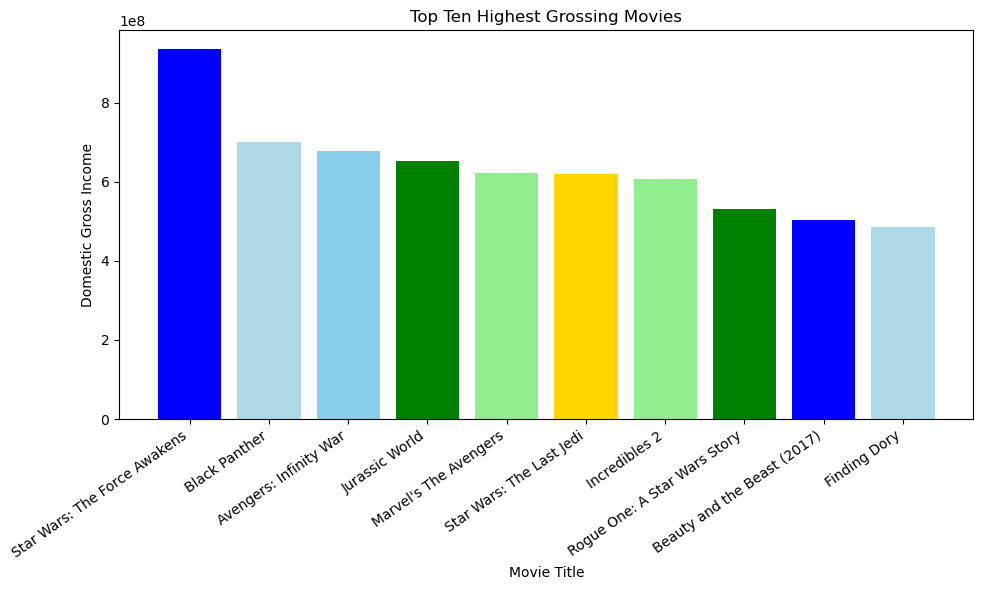

In [55]:
#visualize the highest domestic paying films
plt.figure(figsize=(10, 6))
colors = ['blue', 'lightblue', 'skyblue', 'green', 'lightgreen', 'gold', 'lightgreen', 'green', 'blue', 'lightblue']
plt.bar(top_domesticmarket_movies['title'], top_domesticmarket_movies['domestic_gross'], color=colors)
plt.xlabel('Movie Title')
plt.ylabel('Domestic Gross Income')
plt.title('Top Ten Highest Grossing Movies')
plt.xticks(rotation=5, ha='right')
plt.tight_layout()
plt.show()

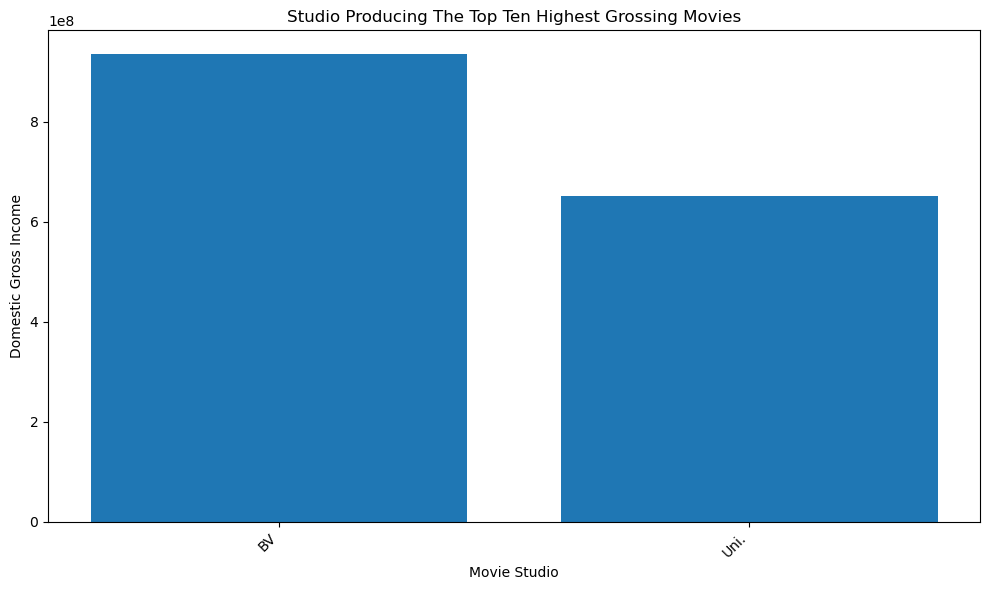

In [65]:
#visualize the best Studio
plt.figure(figsize=(10, 6))

plt.bar(top_domesticmarket_movies['studio'], top_domesticmarket_movies['domestic_gross'])
plt.xlabel('Movie Studio')
plt.ylabel('Domestic Gross Income')
plt.title('Studio Producing The Top Ten Highest Grossing Movies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [35]:
#check for top ten highest foreign gross income movies
top_foreignmarket_movies = movie_gross_df.sort_values(by="foreign_gross",ascending = False).head(10)
top_foreignmarket_movies

,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018
1127,Frozen,BV,400700000.0,875700000.0,2013
2764,Wolf Warrior 2,HC,2700000.0,867600000.0,2017
1477,Transformers: Age of Extinction,Par.,245400000.0,858600000.0,2014
1876,Minions,Uni.,336000000.0,823400000.0,2015
3083,Aquaman,WB,335100000.0,812700000.0,2018
1128,Iron Man 3,BV,409000000.0,805800000.0,2013
